# Game of Thrones Data Analysis

An attempt at predicting game of thrones mortality.

In [116]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib.patches as mpatches
sns.set_style("white")
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os
from pylab import figure, axes, pie, title, show

Two data sets from Kaggle https://www.kaggle.com/malineef/games-of-thrones-datasets

In [117]:
character_deaths = pd.read_csv("GOT_character-deaths.csv")
predictions = pd.read_csv("GOT_character-predictions.csv")

In [118]:
#all titles must be lowercase in order to merge
character_deaths.columns= map(str.lower, character_deaths.columns)

In [119]:
#merge the two csv files
merged = character_deaths.merge(predictions, on='name')
merged.to_csv("output.csv", index=False)

In [120]:
all_characters = pd.read_csv("output.csv")
all_characters.head()

,name,allegiances,death year,book of death,death chapter,book intro chapter,gender,nobility,got,cok,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,...,NaN,NaN,0,1,NaN,0,0,0,0.130435,1
1,Aemon Costayne,Lannister,NaN,NaN,NaN,NaN,1,1,0,0,...,NaN,NaN,0,0,NaN,0,0,0,0.010033,1
2,Aemon Estermont,Baratheon,NaN,NaN,NaN,NaN,1,1,0,1,...,NaN,NaN,0,1,NaN,0,0,0,0.030100,1
3,Aenys Frey,None,300.0,5.0,NaN,59.0,0,1,1,1,...,NaN,1.0,1,1,60.0,0,0,0,0.147157,0
4,Aeron Greyjoy,House Greyjoy,NaN,NaN,NaN,11.0,1,1,0,1,...,NaN,NaN,0,1,36.0,4,1,1,0.458194,1


## Data Exploration and Cleaning

There were initally 850 characters in the dataset. After removing non "popular" characters there were 72 which has resulted in sparse binary data with not much correlation but still some interesting insights into characters and relationships.

In [121]:
#total number characters
all_characters.shape[0]

850

In [123]:
#only going to use ones that are deamed "popular"
ic = all_characters.loc[all_characters['isPopular'] == 1].copy()
ic.head()



,name,allegiances,death year,book of death,death chapter,book intro chapter,gender,nobility,got,cok,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
4,Aeron Greyjoy,House Greyjoy,NaN,NaN,NaN,11.0,1,1,0,1,...,NaN,NaN,0,1,36.0,4,1,1,0.458194,1
37,Arianne Martell,House Martell,NaN,NaN,NaN,2.0,0,1,0,0,...,NaN,NaN,0,1,29.0,0,0,1,0.571906,1
47,Arya Stark,Stark,NaN,NaN,NaN,2.0,0,1,1,1,...,NaN,NaN,0,1,16.0,8,1,1,1.000000,1
48,Arys Oakheart,Lannister,300.0,4.0,21.0,57.0,1,1,1,1,...,NaN,NaN,0,1,NaN,0,0,1,0.344482,0
49,Asha Greyjoy,House Greyjoy,NaN,NaN,NaN,11.0,0,1,0,1,...,NaN,1.0,1,1,30.0,0,0,1,0.709030,1


In [130]:
ic = ic.reset_index(drop=True)
ic.head(5)

,name,allegiances,death year,book of death,death chapter,book intro chapter,gender,nobility,got,cok,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,Aeron Greyjoy,House Greyjoy,NaN,none,NaN,11.0,1,1,0,1,...,NaN,NaN,0,1,36.0,4,1,1,0.458194,1
1,Arianne Martell,House Martell,NaN,none,NaN,2.0,0,1,0,0,...,NaN,NaN,0,1,29.0,0,0,1,0.571906,1
2,Arya Stark,Stark,NaN,none,NaN,2.0,0,1,1,1,...,NaN,NaN,0,1,16.0,8,1,1,1.000000,1
3,Arys Oakheart,Lannister,300.0,4,21.0,57.0,1,1,1,1,...,NaN,NaN,0,1,NaN,0,0,1,0.344482,0
4,Asha Greyjoy,House Greyjoy,NaN,none,NaN,11.0,0,1,0,1,...,NaN,1.0,1,1,30.0,0,0,1,0.709030,1


In [131]:
#create new dataframe for deceased characters
ic['book of death'] = ic['book of death'].fillna('none')
dead_characters = ic[ic['book of death'] != 'none'].copy()
dead_characters.shape[0]

22

In [132]:
#create new dataframe for alive characters
ic['book of death'] = ic['book of death'].fillna('none')
alive_characters = ic[ic['book of death'] == 'none'].copy()
alive_characters.shape[0]

50

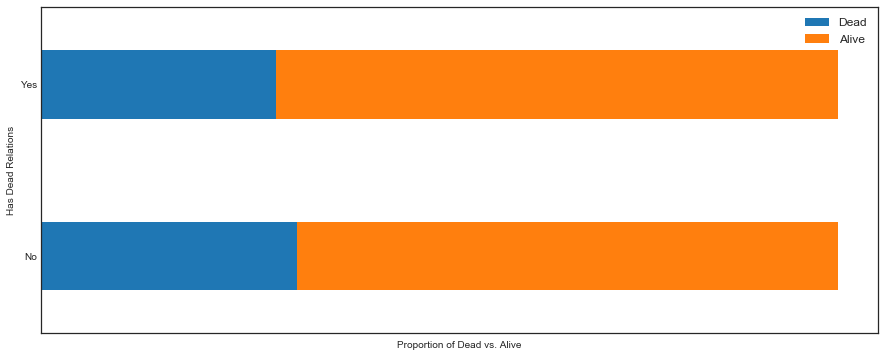

In [133]:
#relationship to survival and relationships survival
data = ic.groupby(["boolDeadRelations", "isAlive"]).count()["S.No"].unstack().copy(deep = True)
p = data.div(data.sum(axis = 1), axis = 0).plot.barh(stacked = True, rot = 0, figsize = (15, 6), width = .4)
_ = p.set_yticklabels(["No", "Yes"]), p.set_xticklabels(""), p.legend(["Dead", "Alive"], fontsize = 12.)
_ = p.set_ylabel("Has Dead Relations"), p.set_xlabel("Proportion of Dead vs. Alive")
plt.savefig('reldeadrel.png')

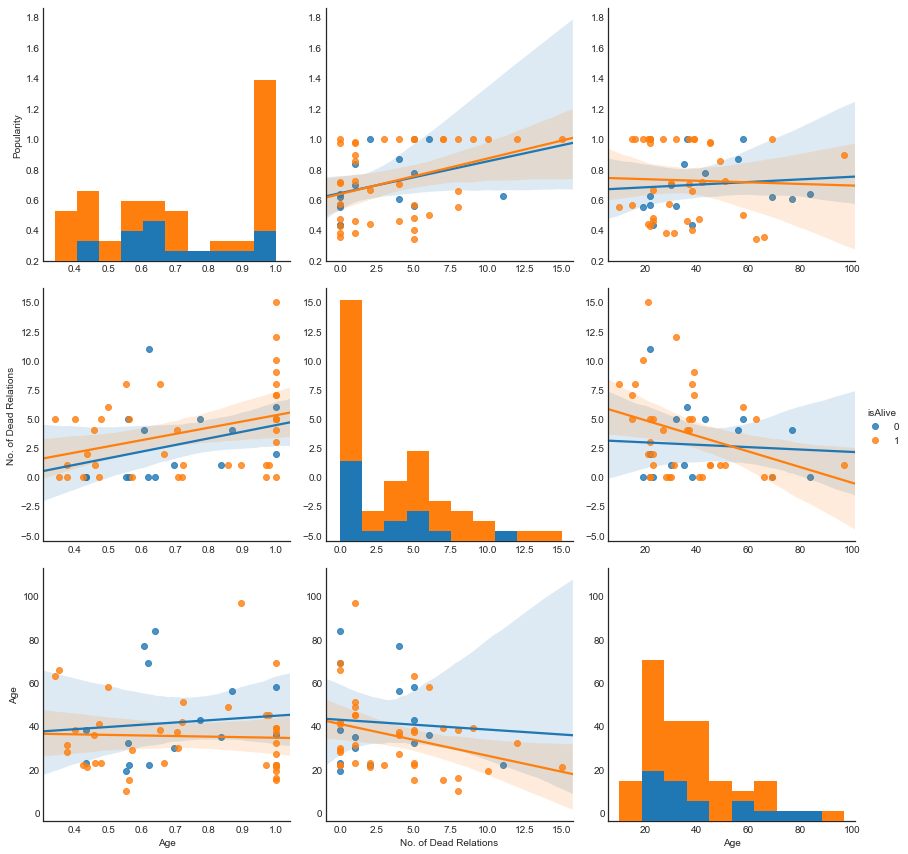

In [134]:
#popularity, dead relaitons and age comparng to survival

p = sns.pairplot(ic[(ic.age >= 0)][["popularity", "numDeadRelations", "age", "isAlive"]], hue = "isAlive", vars = ["popularity", "numDeadRelations", "age"], kind = "reg", size = 4.)
_ = p.axes[0][0].set_ylabel("Popularity"), p.axes[1][0].set_ylabel("No. of Dead Relations"), p.axes[2][0].set_ylabel("Age")
_ = p.axes[2][0].set_xlabel("Age"), p.axes[2][1].set_xlabel("No. of Dead Relations"), p.axes[2][2].set_xlabel("Age")
plt.savefig('reldeadpop.png')

Exploring the houses and allegiances in GOT

In [135]:
ic['allegiances'].unique()

array(['House Greyjoy', 'House Martell', 'Stark', 'Lannister', 'Targaryen',
       "Night's Watch", 'None', 'House Stark', 'House Targaryen',
       'House Tully', 'House Lannister', 'Baratheon', 'Martell', 'Tyrell',
       'House Tyrell', 'Wildling', 'House Baratheon'], dtype=object)

In [136]:
ic['house'].unique()

array(['House Greyjoy', 'House Martell', 'House Stark', 'House Oakheart',
       'House Velaryon', 'House Selmy', nan, 'House Stokeworth',
       'House Targaryen', 'House Tully', 'House Lannister',
       'House Seaworth', 'House Nymeros Martell',
       'brotherhood without banners', 'House Clegane', 'House Rosby',
       'House Swyft', "Night's Watch", 'House Mormont', 'House Poole',
       'House Westerling', 'House Connington',
       'House Lannister of Casterly Rock', 'House Tyrell', 'House Rowan',
       "R'hllor", 'House Frey', "House Baratheon of King's Landing",
       'House Merryweather', 'House Redwyne', 'House Baelish',
       'House Bolton of the Dreadfort', 'House Tarly', 'House Baratheon',
       'House Cassel', 'House Bolton', 'House Florent', 'House Manderly'], dtype=object)

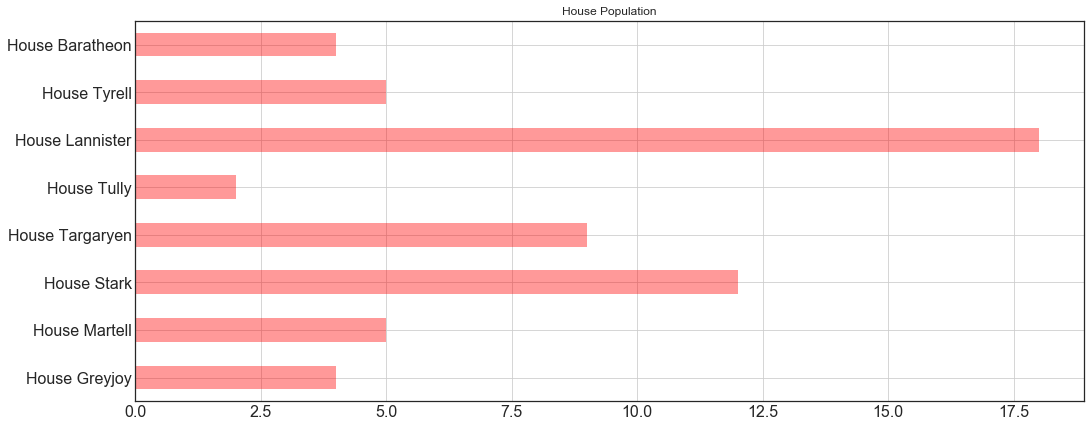

In [138]:
#All the Houses
house_count = Counter(ic['allegiances'])
house_count['House Lannister'] = house_count['Lannister'] + house_count['House Lannister']
house_count['House Stark'] = house_count['Stark'] + house_count['House Stark']
house_count['House Tyrell'] = house_count['Tyrell'] + house_count['House Tyrell']
house_count['House Tully'] = house_count['Tully'] + house_count['House Tully']
house_count['House Targaryen'] = house_count['Targaryen'] + house_count['House Targaryen']
house_count['House Baratheon'] = house_count['Baratheon'] + house_count['House Baratheon']
house_count['House Martell'] = house_count['Martell'] + house_count['House Martell']
house_count['House Greyjoy'] = house_count['Greyjoy'] + house_count['House Greyjoy']

del(house_count['Greyjoy'], house_count['Arryn'], house_count['Martell'], house_count['Baratheon'], house_count['Targaryen'], house_count['None'], house_count["Night's Watch"], house_count['Wildling'], house_count['Lannister'], house_count['Stark'], house_count['Tyrell'], house_count['Tully'])
df = pd.DataFrame.from_dict(house_count, orient = 'index')
df.plot(kind = 'barh',color='r', title='House Population', alpha = 0.4, grid=True, legend= False, figsize= (17,7), fontsize= 16)
#print(df)
plt.show()
plt.savefig('housepop.png')

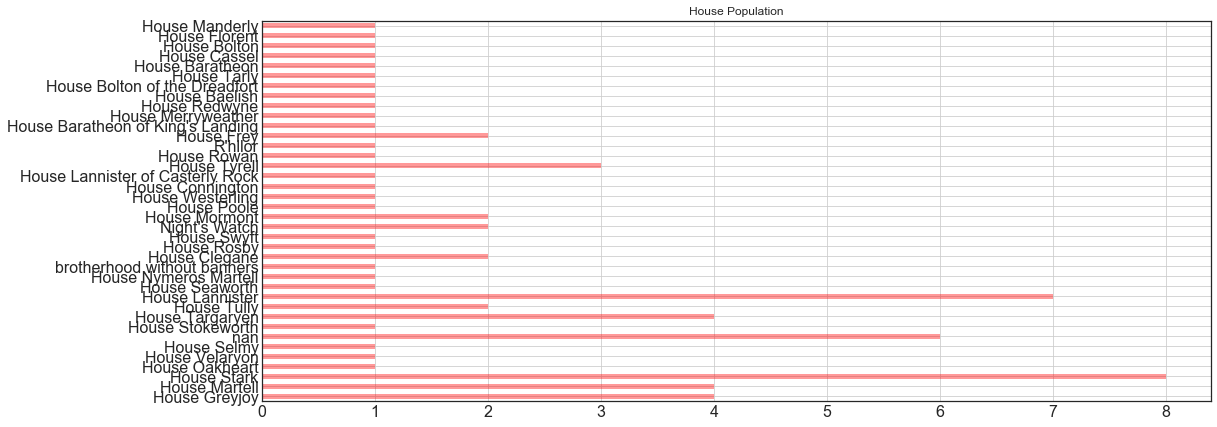

In [139]:
#All the Houses
house_count = Counter(ic['house'])
df = pd.DataFrame.from_dict(house_count, orient = 'index')
df.plot(kind = 'barh',color='r', title='House Population', alpha = 0.4, grid=True, legend= False, figsize= (17,7), fontsize= 16)
plt.show()
plt.savefig('allhousepop.png')

In [140]:
d = {
    'Ironmen':'Ironborn', 
    'Ironborn':'Ironborn', 
    'Dornish':'Dornishmen',
    'Dornishmen': 'Dornishmen',
    'Westermen':'Westerlands', 
    'Westerlands':'Westerlands',
    'Reach':'Reach',
    'Reachmen': 'Reach',
    'The Reach': 'Reach',
    'The Reach':'Reach',
    'Riverlands':'Riverlands',
    'Riverlands':'Rivermen',
    'Rivermen':'Rivermen',
    'Northmen':'Northmen',
    'Valyrian':'Valyrian',
    'Westeros':'Westerosi',
    'Dothraki':'Dothraki',
    'Pentoshi':'Pentoshi',
    'Stormlands':'Stormlander',
    'Free Folk':'Free Folk',
    'Asshai':'Asshai',
    'Valemen':'Valemen',
    'None': 'None'
}

new_df = ic.copy()

new_df['culture'] = new_df['culture'].map(d, na_action=None)
new_df['culture'].head()

0      Ironborn
1    Dornishmen
2      Northmen
3         Reach
4      Ironborn
Name: culture, dtype: object

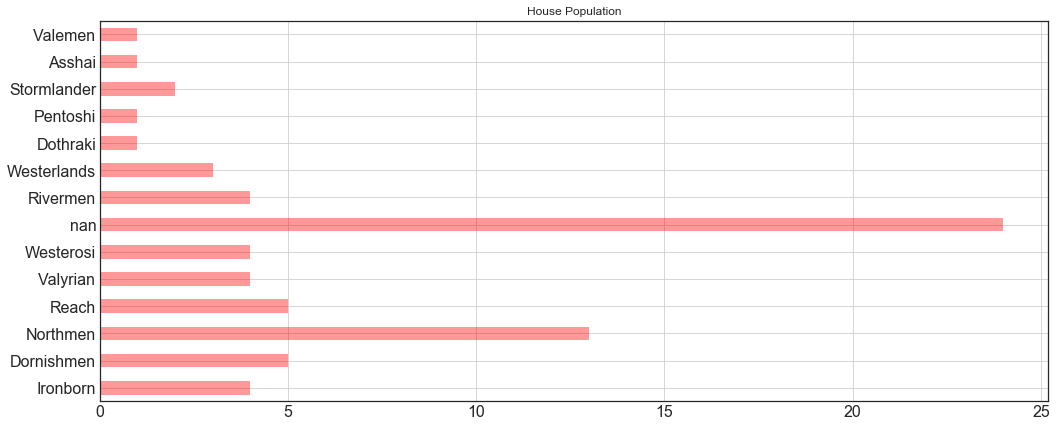

In [141]:
#All the Culture
house_count = Counter(new_df['culture'])
df = pd.DataFrame.from_dict(house_count, orient = 'index')
df.plot(kind = 'barh',color='r', title='House Population', alpha = 0.4, grid=True, legend= False, figsize= (17,7), fontsize= 16)
plt.show()
plt.savefig('culturepop.png')

In [142]:
d = {
    'House Greyjoy':'House Greyjoy',
    'House Martell': 'House Martell',
    'Stark': 'Stark',
    'House Stark': "Stark",
    'Lannister':'Lannister',
    'Targaryen':'Targaryen',
    'House Targaryen':"Targaryen",
    "Night's Watch":"Night's Watch",
    'None':'None',
    'House Tully':'House Tully',
    'House Lannister':'Lannister',
    'Baratheon': 'Baratheon',
    'Martell':'Martell',
    'Tyrell':'Tyrell',
    'House Tyrell':"Tyrell",
    'Wildling':'Wildling',
    'House Baratheon':"Baratheon"
    

}

new_new_df = ic.copy()

new_new_df['allegiances'] = new_new_df['allegiances'].map(d, na_action=None)
new_new_df["allegiances"].head()

0    House Greyjoy
1    House Martell
2            Stark
3        Lannister
4    House Greyjoy
Name: allegiances, dtype: object

In [143]:
#changing the catagories to binary data for culture
dummy = pd.get_dummies(new_new_df, columns=['culture'])
dummy.head()

,name,allegiances,death year,book of death,death chapter,book intro chapter,gender,nobility,got,cok,...,culture_Reachmen,culture_Riverlands,culture_Rivermen,culture_Stormlands,culture_The Reach,culture_Valemen,culture_Valyrian,culture_Westerlands,culture_Westermen,culture_Westeros
0,Aeron Greyjoy,House Greyjoy,NaN,none,NaN,11.0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,Arianne Martell,House Martell,NaN,none,NaN,2.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Arya Stark,Stark,NaN,none,NaN,2.0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,Arys Oakheart,Lannister,300.0,4,21.0,57.0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,Asha Greyjoy,House Greyjoy,NaN,none,NaN,11.0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [144]:
#changing the catagories to binary data for allegiances
df = pd.get_dummies(dummy, columns=["allegiances"])
df.head()

,name,death year,book of death,death chapter,book intro chapter,gender,nobility,got,cok,sos,...,allegiances_House Martell,allegiances_House Tully,allegiances_Lannister,allegiances_Martell,allegiances_Night's Watch,allegiances_None,allegiances_Stark,allegiances_Targaryen,allegiances_Tyrell,allegiances_Wildling
0,Aeron Greyjoy,NaN,none,NaN,11.0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Arianne Martell,NaN,none,NaN,2.0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,Arya Stark,NaN,none,NaN,2.0,0,1,1,1,1,...,0,0,0,0,0,0,1,0,0,0
3,Arys Oakheart,300.0,4,21.0,57.0,1,1,1,1,0,...,0,0,1,0,0,0,0,0,0,0
4,Asha Greyjoy,NaN,none,NaN,11.0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


The features for Death Year, Book of Death, Death Chapter, Mother, Father, Heir, isAliveMother, isAliveFather, and IsAliveHeir are missing a large amount of information.

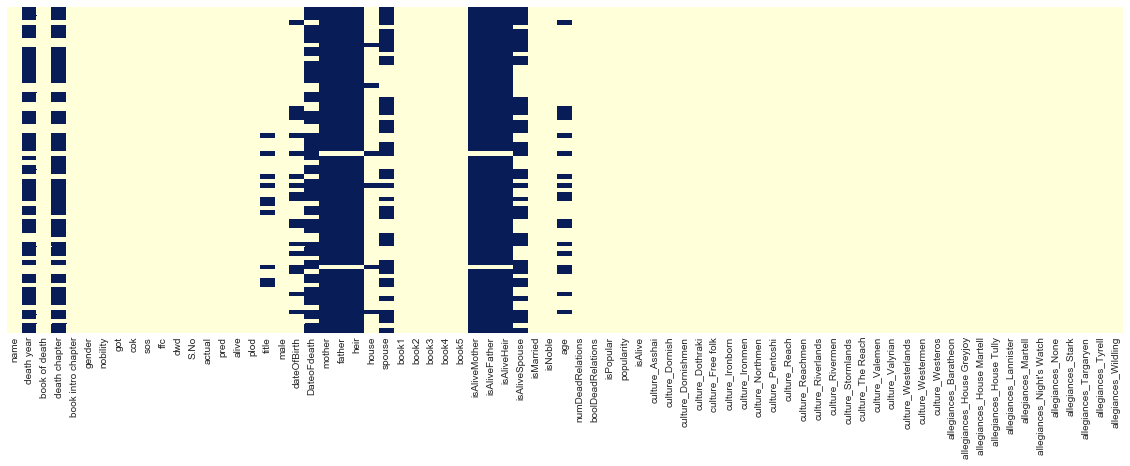

In [145]:
#Looking at what columns have lots of missing data
ax = plt.figure(figsize = (20,6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False, cmap="YlGnBu", linecolor = 'black')
plt.savefig('missingdata.png')

## Looking at Correlation

There appears to be very little correlation which can be expected due to this data being based on fiction.

In [147]:
df.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)
#plt.savefig('correlation.png')

/Users/blakezpalder/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:489: RuntimeWarning: invalid value encountered in less
  np.copyto(xa, -1, where=xa < 0.0)


In [148]:
df['isAlive'].corr(df['popularity'])

0.02639249505677034

In [149]:
df['isAlive'].corr(df['nobility'])

-0.042640143271122061

In [150]:
df['isAlive'].corr(df['age'])

-0.15478414434202845

In [151]:
#alive and deceased family relationship
rel_data = df.groupby(["boolDeadRelations", "isAlive"]).count()
rel_data

name  death year  book of death  death chapter  \
boolDeadRelations isAlive                                                   
0                 0           9           9              9              7   
                  1          19           0             19              0   
1                 0          13          12             13             11   
                  1          31           1             31              1   

                           book intro chapter  gender  nobility  got  cok  \
boolDeadRelations isAlive                                                   
0                 0                         9       9         9    9    9   
                  1                        19      19        19   19   19   
1                 0                        13      13        13   13   13   
                  1                        31      31        31   31   31   

                           sos          ...           \
boolDeadRelations isAlive               ...            
0                 0          9          ...            
                  1         19          ...            
1                 0         13          ...            
                  1         31          ...            

                           allegiances_House Martell  allegiances_House Tully  \
boolDeadRelations isAlive                                                       
0                 0                                9                        9   
                  1                               19                       19   
1                 0                               13                       13   
                  1                               31                       31   

                           allegiances_Lannister  allegiances_Martell  \
boolDeadRelations isAlive                                               
0                 0                            9                    9   
                  1                           19                   19   
1                 0                           13                   13   
                  1                           31                   31   

                           allegiances_Night's Watch  allegiances_None  \
boolDeadRelations isAlive                                                
0                 0                                9                 9   
                  1                               19                19   
1                 0                               13                13   
                  1                               31                31   

                           allegiances_Stark  allegiances_Targaryen  \
boolDeadRelations isAlive                                             
0                 0                        9                      9   
                  1                       19                     19   
1                 0                       13                     13   
                  1                       31                     31   

                           allegiances_Tyrell  allegiances_Wildling  
boolDeadRelations isAlive                                            
0                 0                         9                     9  
                  1                        19                    19  
1                 0                        13                    13  
                  1                        31                    31  

[4 rows x 73 columns]

In [152]:
#alive and deceased family relationship
rel_data = df.groupby(["nobility", "isAlive"]).count()["name"].unstack().copy(deep = True)
rel_data

isAlive,0,1
nobility,,
0,2,6
1,20,44


In [153]:
#drop columns
ic = df.drop(["alive","isPopular","male", "title", "plod", "pred", "actual", "house", "S.No", "heir", "mother", "father", "spouse"], axis=1)

In [154]:
ic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 62 columns):
name                         72 non-null object
death year                   22 non-null float64
book of death                72 non-null object
death chapter                19 non-null float64
book intro chapter           72 non-null float64
gender                       72 non-null int64
nobility                     72 non-null int64
got                          72 non-null int64
cok                          72 non-null int64
sos                          72 non-null int64
ffc                          72 non-null int64
dwd                          72 non-null int64
dateOfBirth                  54 non-null float64
DateoFdeath                  20 non-null float64
book1                        72 non-null int64
book2                        72 non-null int64
book3                        72 non-null int64
book4                        72 non-null int64
book5                        72 non-nul

# Initial Linear Regression Attempt but since using primarily binary data this this was not good for project


In [155]:
test = ic.copy()

In [156]:
test['age'] = test['age'].fillna(test['age'].mean())

In [157]:
test[['age', 'popularity']].head()

,age,popularity
0,36.000000,0.458194
1,29.000000,0.571906
2,16.000000,1.000000
3,37.166667,0.344482
4,30.000000,0.709030


In [158]:
X = test.popularity.values.reshape(-1, 1)
y = test.age.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (72, 1) (72, 1)


In [159]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [160]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [161]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[-0.56470919]]
y-axis intercept:  [ 37.5483595]


In [162]:
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[ 0.34113712]]
Max X Value: [[ 1.]]


In [163]:
X = test.popularity.values.reshape(-1, 1)
y = test.age.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (72, 1) (72, 1)


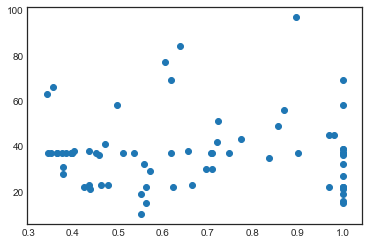

In [164]:
plt.scatter(X, y)

In [165]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [166]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [167]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[-0.56470919]]
y-axis intercept:  [ 37.5483595]


In [168]:
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[ 0.34113712]]
Max X Value: [[ 1.]]


In [169]:
y_min = model.predict(x_min)
y_max = model.predict(x_max)

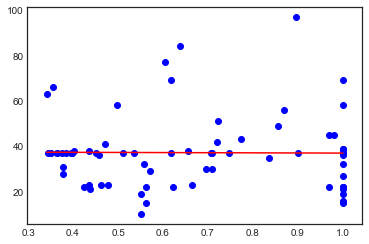

In [170]:
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')

In [171]:
X = ic[["nobility", "popularity"]]
y = ic["isAlive"].values.reshape(-1, 1)

In [172]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=26)

In [173]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [174]:
predictions=model.predict(X_test)

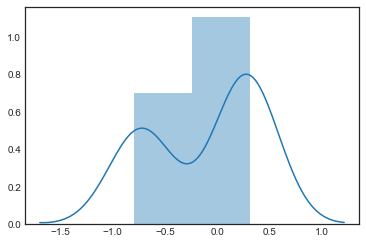

In [175]:
import seaborn as sb
sb.distplot(y_test-predictions)

In [176]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[-0.07978727 -0.07269107]]
y-axis intercept:  [ 0.84317704]


In [177]:
predictions = model.predict(X)
print(f"True output: {y[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y[0]}")

True output: [1]
Predicted output: [ 0.73008316]
Prediction Error: [-0.26991684]


After quantifying the model it shows that these scores are poor.
A "good" MSE score will be close to zero while a "good" R2 Score will be close to 1.

In [178]:
from sklearn.metrics import mean_squared_error, r2_score
predicted = model.predict(X)
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 0.21345916397734363
R-squared (R2 ): -0.005974823689590236


In [179]:
# Overall Score for the model
model.score(X, y)

-0.0059748236895902362

In [180]:
model.score(X_test, y_test)

-0.071881774167711798

In [181]:
ic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 62 columns):
name                         72 non-null object
death year                   22 non-null float64
book of death                72 non-null object
death chapter                19 non-null float64
book intro chapter           72 non-null float64
gender                       72 non-null int64
nobility                     72 non-null int64
got                          72 non-null int64
cok                          72 non-null int64
sos                          72 non-null int64
ffc                          72 non-null int64
dwd                          72 non-null int64
dateOfBirth                  54 non-null float64
DateoFdeath                  20 non-null float64
book1                        72 non-null int64
book2                        72 non-null int64
book3                        72 non-null int64
book4                        72 non-null int64
book5                        72 non-nul

# Attempt to do Logistical Regression

In [183]:
# reminder zero is dead one is alive
new = ic[["gender", "nobility", "got", "cok", "sos", "ffc", "dwd", "dateOfBirth",                
"age",                        
"numDeadRelations",            
"boolDeadRelations",           
"popularity",                  
"isAlive",                    
"culture_Asshai",              
"culture_Dornish",              
"culture_Dornishmen",           
"culture_Dothraki",             
"culture_Free folk",            
"culture_Ironborn",             
"culture_Ironmen",              
"culture_Northmen",            
"culture_Pentoshi",            
"culture_Reach",                
"culture_Reachmen",             
"culture_Riverlands",           
"culture_Rivermen",             
"culture_Stormlands",           
"culture_The Reach",            
"culture_Valemen",             
"culture_Valyrian",            
"culture_Westerlands",          
"culture_Westermen",            
"culture_Westeros",             
"allegiances_Baratheon",        
"allegiances_House Greyjoy",   
"allegiances_House Martell",   
"allegiances_House Tully",     
"allegiances_Lannister",      
"allegiances_Martell",         
"allegiances_Night's Watch",    
"allegiances_None",             
"allegiances_Stark",           
"allegiances_Targaryen",      
"allegiances_Tyrell",          
"allegiances_Wildling"]]
new['age'] = new['age'].fillna(new['age'].mean())
new["dateOfBirth"] = new["dateOfBirth"].fillna(new["dateOfBirth"].mean())
new.head()

/Users/blakezpalder/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/blakezpalder/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,gender,nobility,got,cok,sos,ffc,dwd,dateOfBirth,age,numDeadRelations,...,allegiances_House Martell,allegiances_House Tully,allegiances_Lannister,allegiances_Martell,allegiances_Night's Watch,allegiances_None,allegiances_Stark,allegiances_Targaryen,allegiances_Tyrell,allegiances_Wildling
0,1,1,0,1,0,1,0,269.000000,36.000000,4,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,1,1,276.000000,29.000000,0,...,1,0,0,0,0,0,0,0,0,0
2,0,1,1,1,1,1,1,289.000000,16.000000,8,...,0,0,0,0,0,0,1,0,0,0
3,1,1,1,1,0,1,0,265.333333,37.166667,0,...,0,0,1,0,0,0,0,0,0,0
4,0,1,0,1,0,1,1,275.000000,30.000000,0,...,0,0,0,0,0,0,0,0,0,0


In [184]:
# Assign X (data) and y (target)
X = new.drop("isAlive", axis=1)
y = new["isAlive"]
print(X.shape, y.shape)

(72, 44) (72,)


In [185]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=50, stratify=y)

In [186]:
indexes=X_test.index
list(indexes)
newww= df.iloc[list(indexes)]["name"]
newww.head()

2         Arya Stark
42        Melisandre
3      Arys Oakheart
63    Selyse Florent
46    Oberyn Martell
Name: name, dtype: object

In [187]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [188]:
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [189]:
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [1 1 1 1 1 1 0 1 1 0]
First 10 Actual labels: [1, 1, 0, 1, 0, 1, 0, 1, 1, 0]


In [190]:
v = (predictions - y_test)**2

In [191]:
sum(v)/ len(v)

0.27777777777777779

In [192]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test, "name": newww}).reset_index(drop=True).head(20)

,Actual,Prediction,name
0,1,1,Arya Stark
1,1,1,Melisandre
2,0,1,Arys Oakheart
3,1,1,Selyse Florent
4,0,1,Oberyn Martell
5,1,1,Myrcella Baratheon
6,0,0,Beric Dondarrion
7,1,1,Jeyne Westerling
8,1,1,Samwell Tarly
9,0,0,Eddard Stark


In [193]:
#These characters were predicted to be dead with our model but are alive
final_sw = pd.DataFrame({"Prediction": predictions, "Actual": y_test, "name": newww}).reset_index(drop=True).head(72)
final_sw.head()
final_sw[(final_sw['Prediction'] == 0) & (final_sw['Actual'] == 1)]

,Actual,Prediction,name
13,1,0,Benjen Stark


In [194]:
from sklearn.ensemble import RandomForestClassifier
feature_names = new.columns
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.77777777777777779

In [195]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.15397255531398796, 'dateOfBirth'),
 (0.12589245453505682, 'age'),
 (0.11215766104242311, 'dwd'),
 (0.10872982163691139, 'popularity'),
 (0.06261728388124807, 'numDeadRelations'),
 (0.059588936751546147, 'ffc'),
 (0.037552823385236661, 'got'),
 (0.034965227511225008, "allegiances_Night's Watch"),
 (0.029231992483303864, 'boolDeadRelations'),
 (0.027826264053614949, 'allegiances_House Tully'),
 (0.022237900083376578, 'cok'),
 (0.018683787592708875, 'culture_Ironmen'),
 (0.016966913365767902, 'allegiances_None'),
 (0.015773737852846734, 'allegiances_Stark'),
 (0.014468892999946869, 'culture_Valemen'),
 (0.014078555615365546, 'culture_Riverlands'),
 (0.013735870657881708, 'culture_Dornishmen'),
 (0.013045303182982956, 'sos'),
 (0.011832827893952146, 'gender'),
 (0.011147859785361806, 'culture_Rivermen'),
 (0.010860625826030928, 'allegiances_Lannister'),
 (0.010752946771761423, 'culture_Reachmen'),
 (0.0091857260996034643, 'nobility'),
 (0.0088990843299783205, 'allegiances_House Martell

In [196]:
#A "good" MSE score will be close to zero while a "good" R2 Score will be close to 1.
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to predict a value
predicted = classifier.predict(X)

# Score the prediction with mse and r2
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 0.18055555555555555
R-squared (R2 ): 0.14909090909090916


In [197]:
classifier.score(X, y)

0.81944444444444442

# Attempt at KMeans

In [242]:
# reminder zero is dead one is alive
new = ic[["gender", "nobility", "got", "cok", "sos", "ffc", "dwd", "dateOfBirth",                
"age",                        
"numDeadRelations",            
"boolDeadRelations",           
"popularity",                  
"isAlive",                    
"culture_Asshai",              
"culture_Dornish",              
"culture_Dornishmen",           
"culture_Dothraki",             
"culture_Free folk",            
"culture_Ironborn",             
"culture_Ironmen",              
"culture_Northmen",            
"culture_Pentoshi",            
"culture_Reach",                
"culture_Reachmen",             
"culture_Riverlands",           
"culture_Rivermen",             
"culture_Stormlands",           
"culture_The Reach",            
"culture_Valemen",             
"culture_Valyrian",            
"culture_Westerlands",          
"culture_Westermen",            
"culture_Westeros",             
"allegiances_Baratheon",        
"allegiances_House Greyjoy",   
"allegiances_House Martell",   
"allegiances_House Tully",     
"allegiances_Lannister",      
"allegiances_Martell",         
"allegiances_Night's Watch",    
"allegiances_None",             
"allegiances_Stark",           
"allegiances_Targaryen",      
"allegiances_Tyrell",          
"allegiances_Wildling"]]
new['age'] = new['age'].fillna(new['age'].mean())
new["dateOfBirth"] = new["dateOfBirth"].fillna(new["dateOfBirth"].mean())
new.head()

/Users/blakezpalder/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/blakezpalder/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,gender,nobility,got,cok,sos,ffc,dwd,dateOfBirth,age,numDeadRelations,...,allegiances_House Martell,allegiances_House Tully,allegiances_Lannister,allegiances_Martell,allegiances_Night's Watch,allegiances_None,allegiances_Stark,allegiances_Targaryen,allegiances_Tyrell,allegiances_Wildling
0,1,1,0,1,0,1,0,269.000000,36.000000,4,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,1,1,276.000000,29.000000,0,...,1,0,0,0,0,0,0,0,0,0
2,0,1,1,1,1,1,1,289.000000,16.000000,8,...,0,0,0,0,0,0,1,0,0,0
3,1,1,1,1,0,1,0,265.333333,37.166667,0,...,0,0,1,0,0,0,0,0,0,0
4,0,1,0,1,0,1,1,275.000000,30.000000,0,...,0,0,0,0,0,0,0,0,0,0


In [243]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
 
import pandas as pd
import numpy as np

In [244]:
# Assign X (data) and y (target)
X = new.drop("isAlive", axis=1)
y = new["isAlive"]
print(X.shape, y.shape)

(72, 44) (72,)


In [246]:
indexes=X_test.index
list(indexes)
newww= df.iloc[list(indexes)]["name"]
newww.head()

2         Arya Stark
42        Melisandre
3      Arys Oakheart
63    Selyse Florent
46    Oberyn Martell
Name: name, dtype: object

In [247]:
# K Means Cluster
model = KMeans(n_clusters=2)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [248]:
# This is what KMeans thought
model.labels_

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1], dtype=int32)

In [249]:
predY = np.choose(model.labels_, [1, 0]).astype(np.int64)
print (model.labels_)
print (predY)

[0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1]
[1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0]


In [250]:
sm.accuracy_score(y, predY)

0.69444444444444442

In [251]:
sm.confusion_matrix(y, predY)

array([[ 5, 17],
       [ 5, 45]])

In [252]:
pd.DataFrame({"Prediction": predY, "Actual": y, "name": newww}).reset_index(drop=True).head(20)

,Actual,Prediction,name
0,1,1,Aeron Greyjoy
1,1,1,NaN
2,1,1,Arya Stark
3,0,1,Arys Oakheart
4,1,1,NaN
5,1,1,NaN
6,1,0,NaN
7,1,1,Benjen Stark
8,0,1,Beric Dondarrion
9,1,1,NaN


# Support Vector Machine


In [204]:
new = ic[["gender", "nobility", "got", "cok", "sos", "ffc", "dwd", "dateOfBirth",                
"age",                        
"numDeadRelations",            
"boolDeadRelations",           
"popularity",                  
"isAlive",                    
"culture_Asshai",              
"culture_Dornish",              
"culture_Dornishmen",           
"culture_Dothraki",             
"culture_Free folk",            
"culture_Ironborn",             
"culture_Ironmen",              
"culture_Northmen",            
"culture_Pentoshi",            
"culture_Reach",                
"culture_Reachmen",             
"culture_Riverlands",           
"culture_Rivermen",             
"culture_Stormlands",           
"culture_The Reach",            
"culture_Valemen",             
"culture_Valyrian",            
"culture_Westerlands",          
"culture_Westermen",            
"culture_Westeros",             
"allegiances_Baratheon",        
"allegiances_House Greyjoy",   
"allegiances_House Martell",   
"allegiances_House Tully",     
"allegiances_Lannister",      
"allegiances_Martell",         
"allegiances_Night's Watch",    
"allegiances_None",             
"allegiances_Stark",           
"allegiances_Targaryen",      
"allegiances_Tyrell",          
"allegiances_Wildling"]]
new['age'] = new['age'].fillna(new['age'].mean())
new["dateOfBirth"] = new["dateOfBirth"].fillna(new["dateOfBirth"].mean())
new.head()

/Users/blakezpalder/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/blakezpalder/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,gender,nobility,got,cok,sos,ffc,dwd,dateOfBirth,age,numDeadRelations,...,allegiances_House Martell,allegiances_House Tully,allegiances_Lannister,allegiances_Martell,allegiances_Night's Watch,allegiances_None,allegiances_Stark,allegiances_Targaryen,allegiances_Tyrell,allegiances_Wildling
0,1,1,0,1,0,1,0,269.000000,36.000000,4,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,1,1,276.000000,29.000000,0,...,1,0,0,0,0,0,0,0,0,0
2,0,1,1,1,1,1,1,289.000000,16.000000,8,...,0,0,0,0,0,0,1,0,0,0
3,1,1,1,1,0,1,0,265.333333,37.166667,0,...,0,0,1,0,0,0,0,0,0,0
4,0,1,0,1,0,1,1,275.000000,30.000000,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
target = new["isAlive"]
target_names = ["dead", "alive"]

In [94]:
data = new.drop("isAlive", axis=1)
feature_names = data.columns
data.head()

,gender,nobility,got,cok,sos,ffc,dwd,dateOfBirth,age,numDeadRelations,...,allegiances_House Martell,allegiances_House Tully,allegiances_Lannister,allegiances_Martell,allegiances_Night's Watch,allegiances_None,allegiances_Stark,allegiances_Targaryen,allegiances_Tyrell,allegiances_Wildling
0,1,1,0,1,0,1,0,269.000000,36.000000,4,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,1,1,276.000000,29.000000,0,...,1,0,0,0,0,0,0,0,0,0
2,0,1,1,1,1,1,1,289.000000,16.000000,8,...,0,0,0,0,0,0,1,0,0,0
3,1,1,1,1,0,1,0,265.333333,37.166667,0,...,0,0,1,0,0,0,0,0,0,0
4,0,1,0,1,0,1,1,275.000000,30.000000,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42, stratify=y)

In [96]:
indexes=X_test.index
list(indexes)
newww= ic.iloc[list(indexes)]["name"]
newww.head()

60      Samwell Tarly
30     Jon Connington
63     Selyse Florent
34    Kevan Lannister
61     Sandor Clegane
Name: name, dtype: object

In [97]:
from sklearn.svm import SVC 
model = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=.0001, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [98]:
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 0.944


In [99]:
#A "good" MSE score will be close to zero while a "good" R2 Score will be close to 1.
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to predict a value
predicted = classifier.predict(X)

# Score the prediction with mse and r2
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 0.18055555555555555
R-squared (R2 ): 0.14909090909090916


In [100]:
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

             precision    recall  f1-score   support

       dead       1.00      0.83      0.91         6
      alive       0.92      1.00      0.96        12

avg / total       0.95      0.94      0.94        18



In [101]:
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [1 1 1 1 1 1 1 1 1 1]
First 10 Actual labels: [1, 1, 1, 0, 0, 0, 1, 1, 1, 1]


In [102]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test, "name": newww}).reset_index(drop=True).head(20)

,Actual,Prediction,name
0,1,1,Samwell Tarly
1,1,1,Jon Connington
2,1,1,Selyse Florent
3,0,1,Kevan Lannister
4,0,1,Sandor Clegane
5,0,1,Gyles Rosby
6,1,1,Qyburn
7,1,1,Mance Rayder
8,1,1,Arya Stark
9,1,1,Gendry


In [103]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.66666666666666663

In [104]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.11990076981342511, 'dwd'),
 (0.11619271597730407, 'dateOfBirth'),
 (0.11217427736736919, 'ffc'),
 (0.091348181579042023, 'age'),
 (0.090563738387094861, 'popularity'),
 (0.070470306814869987, 'numDeadRelations'),
 (0.041771288270157178, 'cok'),
 (0.041423839952647673, 'got'),
 (0.03158036273428181, 'gender'),
 (0.027928978047023857, 'sos'),
 (0.020619230983757276, 'allegiances_Lannister'),
 (0.015696550123817144, 'culture_Northmen'),
 (0.015158983422019004, 'boolDeadRelations'),
 (0.015057109523538479, 'culture_Rivermen'),
 (0.013752576155632235, 'culture_Stormlands'),
 (0.013221926897997642, 'allegiances_Targaryen'),
 (0.013123031859050647, 'culture_Dornishmen'),
 (0.01298253254377495, 'allegiances_Stark'),
 (0.011928593067098118, 'culture_Riverlands'),
 (0.011568846726376576, 'allegiances_Martell'),
 (0.011561640957520845, 'allegiances_None'),
 (0.011002023419740683, "allegiances_Night's Watch"),
 (0.010217120502419064, 'culture_Dothraki'),
 (0.0091958316721406606, 'culture_Valyr

# Apply Gridsearch

In [105]:
# Split data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [106]:
indexes=X_test.index
list(indexes)

newww= ic.iloc[list(indexes)]["name"]
newww.head()

4      Asha Greyjoy
62      Sansa Stark
18     Eddard Stark
0     Aeron Greyjoy
28      Jeyne Poole
Name: name, dtype: object

In [107]:
# Create the SVC Model
from sklearn.svm import SVC 
model = SVC(C= 1, gamma=0.0001, kernel='linear')
model

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [108]:
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [109]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=1, gamma=0.0001 ...............................................
[CV] ...... C=1, gamma=0.0001, score=0.9444444444444444, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ...... C=1, gamma=0.0001, score=0.9444444444444444, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ..................... C=1, gamma=0.0001, score=1.0, total=   0.0s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ...... C=1, gamma=0.0005, score=0.9444444444444444, total=   0.0s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ...... C=1, gamma=0.0005, score=0.9444444444444444, total=   0.0s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ..................... C=1, gamma=0.0005, score=1.0, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ....... C=1

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=5, gamma=0.001 ................................................
[CV] ...................... C=5, gamma=0.001, score=1.0, total=   0.0s
[CV] C=5, gamma=0.005 ................................................
[CV] ....... C=5, gamma=0.005, score=0.9444444444444444, total=   0.0s
[CV] C=5, gamma=0.005 ................................................
[CV] ....... C=5, gamma=0.005, score=0.9444444444444444, total=   0.0s
[CV] C=5, gamma=0.005 ................................................
[CV] ...................... C=5, gamma=0.005, score=1.0, total=   0.0s
[CV] C=10, gamma=0.0001 ..............................................
[CV] ..... C=10, gamma=0.0001, score=0.9444444444444444, total=   0.0s
[CV] C=10, gamma=0.0001 ..............................................
[CV] ..... C=10, gamma=0.0001, score=0.9444444444444444, total=   0.0s
[CV] C=10, gamma=0.0001 ..............................................
[CV] .................... C=10, gamma=0.0001, score=1.0, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.5s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1, 5, 10, 50], 'gamma': [0.0001, 0.0005, 0.001, 0.005]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [110]:
print(grid.best_params_)

{'C': 1, 'gamma': 0.0001}


In [111]:
print(grid.best_score_)

0.962962962963


In [112]:
predictions = grid.predict(X_test)

In [113]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["alive", "dead"]))

             precision    recall  f1-score   support

      alive       1.00      0.75      0.86         4
       dead       0.93      1.00      0.97        14

avg / total       0.95      0.94      0.94        18



In [114]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test, "name": newww}).reset_index(drop=True).head(30)

,Actual,Prediction,name
0,1,1,Asha Greyjoy
1,1,1,Sansa Stark
2,0,0,Eddard Stark
3,1,1,Aeron Greyjoy
4,1,1,Jeyne Poole
5,0,0,Pycelle
6,1,1,Bronn
7,0,0,Kevan Lannister
8,1,1,Brynden Tully
9,1,1,Randyll Tarly
